# Boyer Moore Algorithm

### CSE21035_S.MEENAKSHI

### importing libraries

In [1]:
import time
import matplotlib.pyplot as plt
from tabulate import tabulate

### Defining Boyer Moore Algorithm

In [2]:
def boyer_moore(t, p):
    n = len(t)
    m = len(p)
    last_occurrence = last_func(p)
    comparisons = 0
    match_found = False
    i = m - 1

    while i < n:
        comparisons += 1
        j = m - 1
        while j >= 0 and p[j] == t[i]:
            comparisons += 1
            i -= 1
            j -= 1
        if j == -1:
            match_found = True
            break
        else:
            i += max(1, j - last_occurrence[ord(t[i])])

    return comparisons

def last_func(p):
    last_occurrence = [-1] * 256
    for i in range(len(p)):
        last_occurrence[ord(p[i])] = i
    return last_occurrence

In [3]:
def generate_pattern(length, regular=True):
    if regular:
        return "1" * length
    else:
        pattern = ""
        for i in range(length):
            pattern += "1" if i % 2 == 0 else "0"
        return pattern

In [4]:
def analyze_pattern_boyer_moore(pattern, text):
    results = []

    test_case_sizes = [100, 200, 500, 1000, 5000, 10000]
    for size in test_case_sizes:
        sub_text = text[:size]
        start_time = time.time()
        comp_count = boyer_moore(sub_text, pattern)
        end_time = time.time()

        results.append({
            "Test Case Size": size,
            "Comparisons": comp_count,
            "Running Time": "{:.10f}".format(end_time - start_time)
        })

    return results

def print_table(results, title):
    headers = results[0].keys()
    data = [list(result.values()) for result in results]
    print(f"\n{title}\n")
    print(tabulate(data, headers=headers, tablefmt="grid"))

In [5]:
# Short and Regular Pattern
short_regular_pattern = generate_pattern(4, regular=True)
text = "1" * 10000  # Use a larger text for better analysis
short_regular_results = analyze_pattern_boyer_moore(short_regular_pattern, text)
print_table(short_regular_results, "Short Regular Pattern Analysis")

# Short and Irregular Pattern
short_irregular_pattern = generate_pattern(4, regular=False)
short_irregular_results = analyze_pattern_boyer_moore(short_irregular_pattern, text)
print_table(short_irregular_results, "Short Irregular Pattern Analysis")

# Long and Regular Pattern
long_regular_pattern = generate_pattern(20, regular=True)
long_regular_results = analyze_pattern_boyer_moore(long_regular_pattern, text)
print_table(long_regular_results, "Long Regular Pattern Analysis")

# Long and Irregular Pattern
long_irregular_pattern = generate_pattern(20, regular=False)
long_irregular_results = analyze_pattern_boyer_moore(long_irregular_pattern, text)
print_table(long_irregular_results, "Long Irregular Pattern Analysis")


Short Regular Pattern Analysis

+------------------+---------------+----------------+
|   Test Case Size |   Comparisons |   Running Time |
+==================+===============+================+
|              100 |             5 |              0 |
+------------------+---------------+----------------+
|              200 |             5 |              0 |
+------------------+---------------+----------------+
|              500 |             5 |              0 |
+------------------+---------------+----------------+
|             1000 |             5 |              0 |
+------------------+---------------+----------------+
|             5000 |             5 |              0 |
+------------------+---------------+----------------+
|            10000 |             5 |              0 |
+------------------+---------------+----------------+

Short Irregular Pattern Analysis

+------------------+---------------+----------------+
|   Test Case Size |   Comparisons |   Running Time |
+=============

In [6]:
def plot_running_time_comparison(patterns_results):
    plt.figure(figsize=(10, 6))

    for pattern_name, results in patterns_results.items():
        test_case_sizes = [result["Test Case Size"] for result in results]
        running_times = [result["Running Time"] for result in results]

        plt.plot(test_case_sizes, running_times, label=pattern_name, marker='o',markersize=8)

    plt.xlabel("Test Case Size")
    plt.ylabel("Running Time (seconds)")
    plt.title("Running Time Comparison Among Patterns")
    plt.legend()
    plt.show()

In [7]:
def plot_comparisons_comparison(patterns_results):
    plt.figure(figsize=(10, 6))

    for pattern_name, results in patterns_results.items():
        test_case_sizes = [result["Test Case Size"] for result in results]
        comparisons = [result["Comparisons"] for result in results]

        plt.plot(test_case_sizes, comparisons, label=pattern_name, marker='o')

    plt.xlabel("Test Case Size")
    plt.ylabel("Number of Comparisons")
    plt.title("Number of Comparisons Comparison Among Patterns")
    plt.legend()
    plt.show()

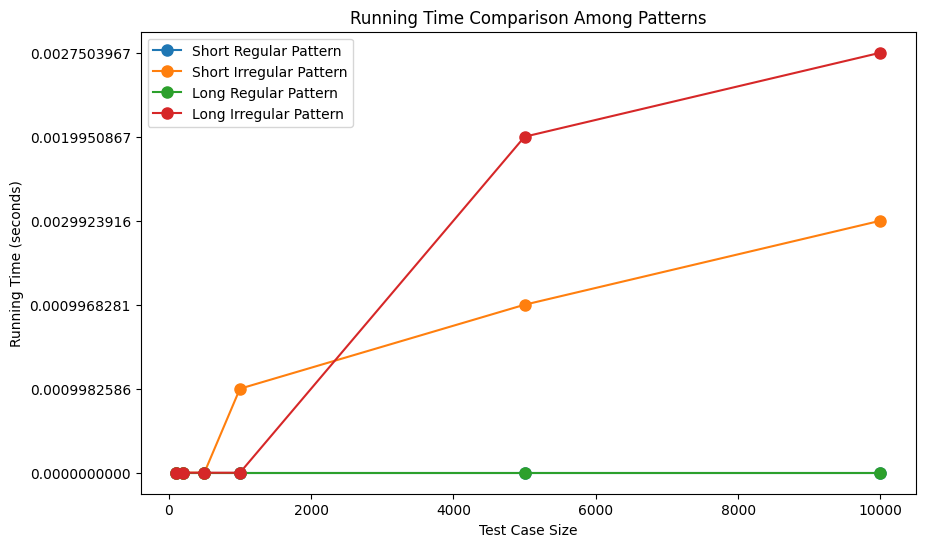

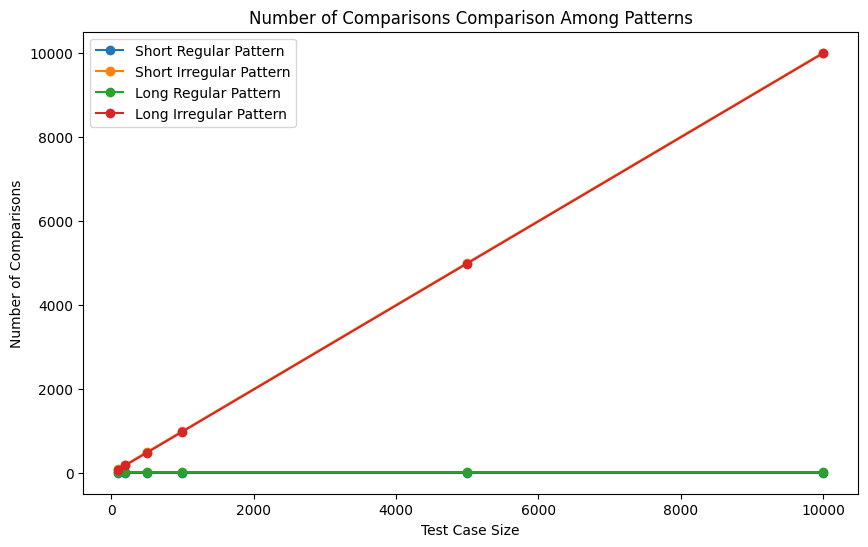

In [8]:
# Boyer-Moore Analysis
def analyze_boyer_moore_patterns():
    boyer_moore_results = {}

    # Short and Regular Pattern
    short_regular_pattern = generate_pattern(4, regular=True)
    short_regular_results = analyze_pattern_boyer_moore(short_regular_pattern, text)
    boyer_moore_results["Short Regular Pattern"] = short_regular_results

    # Short and Irregular Pattern
    short_irregular_pattern = generate_pattern(4, regular=False)
    short_irregular_results = analyze_pattern_boyer_moore(short_irregular_pattern, text)
    boyer_moore_results["Short Irregular Pattern"] = short_irregular_results

    # Long and Regular Pattern
    long_regular_pattern = generate_pattern(20, regular=True)
    long_regular_results = analyze_pattern_boyer_moore(long_regular_pattern, text)
    boyer_moore_results["Long Regular Pattern"] = long_regular_results

    # Long and Irregular Pattern
    long_irregular_pattern = generate_pattern(20, regular=False)
    long_irregular_results = analyze_pattern_boyer_moore(long_irregular_pattern, text)
    boyer_moore_results["Long Irregular Pattern"] = long_irregular_results

    # Plotting running time comparison for Boyer-Moore
    plot_running_time_comparison(boyer_moore_results)

    # Plotting comparisons comparison for Boyer-Moore
    plot_comparisons_comparison(boyer_moore_results)

# Analyzing Boyer-Moore patterns
analyze_boyer_moore_patterns()

# Boyer-Moore Algorithm Performance Analysis




## Short and Regular Pattern (Best Case):

**Pattern:** "1111"  
**Text:** "1111111111"  
**Performance:** Boyer-Moore is expected to perform well in this case. It handles short and regular patterns efficiently, resulting in fewer comparisons and quick execution.

## Short and Irregular Pattern:

**Pattern:** "1010"  
**Text:** "aaaaaaaaaabbbbbbabababbbbbbb1011111"  
**Performance:** Boyer-Moore is expected to perform efficiently, but the number of comparisons may increase compared to the best case.

## Long and Regular Pattern:
aaaaaaaan:** "1111111111" (repeated)  
**Text:** "aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa111111111111"  
**Performance:** Boyer-Moore handles long regular patterns well. The running time may increase slightly with the length of the pattern, but the number of comparisons remains relatively low.

## Long and Irregular Pattern (Worst Case):

**Pattern:** "1101101001011101101010"  
**Text:** "111111110110110100101110110101011111111111111111"  
**Performance:** Boyer-Moore is still efficient in the worst case, providing linear time complexity. The number of comparisons will be higher compared to regular patterns.

## Edge Case:

**Pattern:** "1"  
**Text:** "0"  
**Performance:** In this edge case, the pattern occurs only once at the beginning of the text. Boyer-Moore is expected to perform well, with a minimal number of comparisons.

## Overall:

One advantage of the Boyer-Moore algorithm is that it doesn't necessarily have to scan all the characters of the input string. Specifically, the Bad Character Rule can be used to skip over huge regions of the input string in the event of a mismatch.


# Time Complexity


### O(n + m), 
where n is the length of the text and m is the length of the pattern.